# Compartment comparison  
Comparing the mitochondria volume and mitochondrial complexity index across axons, somas, basal dendrites, and apical dendrites.

In [1]:
from meshparty import trimesh_io  # first import to remove static TLS error

from collections import Counter

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

from lib import plot, u

matplotlib.rc('font', family='sans-serif')
matplotlib.rc('font', serif='Helvetica')

# Reading data

In [2]:
analysisids = u.readids("data/pyc_analysis_ids.csv")
completeids = u.readids("data/pyc_analysis_completesoma_ids.csv")

In [3]:
mitodf = pd.read_csv("data/pni_mito_analysisids_fullstats.csv", index_col=0)

In [4]:
mitodf = mitodf[mitodf.cellid.isin(analysisids)]

In [5]:
mitodf.head()

,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,pathlength
mito_id,,,,,,,,,,,,,,,,,,
2740474,274528,91786,54770,1149,90910,54262,1075,92688,55174,1189,648518346349491311,367144,219080,45960,4.619493,31.516497,Basal,8844.850183
1118099,330204,62682,57352,963,62072,56704,945,63402,58050,981,648518346349491311,250728,229408,38520,4.780969,24.149679,Basal,7005.947856
2496428,82572,86324,49084,1425,86108,48946,1414,86514,49182,1437,648518346349491311,345296,196336,57000,1.159900,5.514730,Basal,1799.573843
1886895,87536,76536,38810,1592,76166,38656,1562,76858,38964,1628,648518346349491311,306144,155240,63680,1.670600,14.661304,Basal,3828.361034
1649845,984232,71966,39020,1221,71236,38656,1063,73346,39484,1347,648518346349491311,287864,156080,48840,12.159270,44.715253,Basal,14378.311217


In [6]:
mitodf.shape

(176072, 18)

# Basic statistics

In [7]:
compartments = ['Axonal', 'Somatic', 'Apical', 'Basal']

def printstats(statisticlist):
    for comp, stat in zip(compartments, statisticlist):
        print(f"{comp}: {stat}")

In [8]:
# Computing the 95th percentile values
vol_p95s = list()
mci_p95s = list()

for comp in compartments:
    subdf = mitodf[mitodf.compartment == comp]
    
    vol_p95s.append(np.percentile(subdf.mito_vx * plot.DEFAULT_VX_VOL, 95))
    mci_p95s.append(np.percentile(subdf.complexityindex, 95))

In [9]:
printstats(vol_p95s)

Axonal: 0.04214462951040001
Somatic: 0.2407867308287998
Apical: 0.7791474051999989
Basal: 0.6936547374848


In [10]:
printstats(mci_p95s)

Axonal: 7.183863347275042
Somatic: 23.316341263071763
Apical: 54.99687182971786
Basal: 49.25692355762649


In [11]:
# Computing the 25th, 50th (median), and 75th percentiles
vol_quartiles = list()
mci_quartiles = list()

for comp in compartments:
    subdf = mitodf[mitodf.compartment == comp]
    
    vol_quartiles.append(np.percentile(subdf.mito_vx
                                       * plot.DEFAULT_VX_VOL, [25, 50, 75]))
    mci_quartiles.append(np.percentile(subdf.complexityindex, [25, 50, 75]))

In [12]:
printstats(vol_quartiles)

Axonal: [0.00763601 0.01300813 0.020861  ]
Somatic: [0.01317116 0.03263978 0.08049109]
Apical: [0.01915026 0.06215236 0.20497679]
Basal: [0.02652687 0.09523918 0.24218638]


In [13]:
printstats(mci_quartiles)

Axonal: [1.62865836 2.45647607 3.77472996]
Somatic: [2.67307378 5.18730973 9.7578682 ]
Apical: [ 3.43617193  7.64271002 17.75550727]
Basal: [ 3.87872862  9.10654901 19.44942029]


In [14]:
Counter(mitodf.compartment)

Counter({'Basal': 53318,
         'Somatic': 90193,
         'Axonal': 11484,
         'Apical': 18608,
         'Unknown': 1811,
         'Unknown dendritic': 658})

In [15]:
sum(Counter(mitodf.compartment).values())

176072

In [16]:
len(pd.unique(mitodf.cellid))

351

# Plots

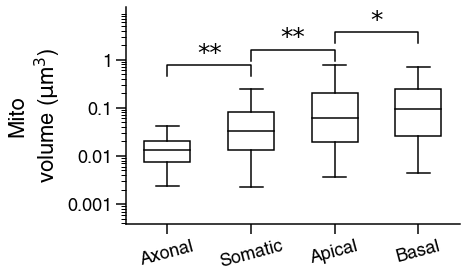

In [17]:
plt.figure(figsize=(6, 4))
fontsize = plot.AXIS_FONTSIZE - 3
axis_fontsize = 18

# Compartment boxplot
plot.boxplot_by_comp(mitodf, varscale=plot.DEFAULT_VX_VOL, width=0.55)
plt.yscale("log")

plot.barplot_annotate_brackets(0, 1, '**', np.arange(4),
                               vol_p95s, dh=0.06, logy=True)
plot.barplot_annotate_brackets(1, 2, '**', np.arange(4),
                               vol_p95s, dh=0.02, logy=True)
plot.barplot_annotate_brackets(2, 3, '*', np.arange(4),
                               vol_p95s, dh=0.1, logy=True)

plt.xticks(rotation=15, fontsize=axis_fontsize)
plt.yticks(fontsize=axis_fontsize)
plt.ylabel("Mito\nvolume ($\mathrm{\mu}$m$^3$)", fontsize=fontsize)
plt.yticks([0.001, 0.01, 0.1, 1], labels=["0.001", "0.01", "0.1", "1"])

plt.show()

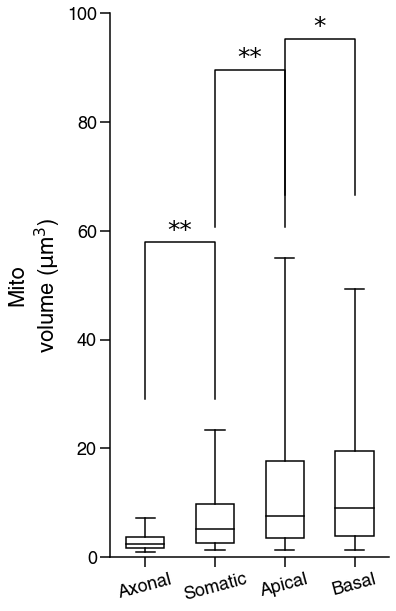

In [18]:
plt.figure(figsize=(5, 10))
fontsize = plot.AXIS_FONTSIZE - 3
axis_fontsize = 18

# Compartment boxplot
plot.boxplot_by_comp(mitodf, varname="complexityindex", width=0.55)

plot.barplot_annotate_brackets(0, 1, '**', np.arange(4), mci_p95s, dh=0.01)
plot.barplot_annotate_brackets(1, 2, '**', np.arange(4), mci_p95s, dh=0.01)
plot.barplot_annotate_brackets(2, 3, '*', np.arange(4), mci_p95s, dh=0.02)

plt.xticks(rotation=15, fontsize=axis_fontsize)
plt.yticks(fontsize=axis_fontsize)
plt.ylabel("Mito\nvolume ($\mathrm{\mu}$m$^3$)", fontsize=fontsize)
plt.ylim(0, 100)

plt.show()

# Statistical tests

In [19]:
axon_to_soma = stats.mannwhitneyu(
    mitodf.mito_vx[mitodf.compartment == "Axonal"],
    mitodf.mito_vx[mitodf.compartment == "Somatic"],
    alternative="less")

soma_to_apical = stats.mannwhitneyu(
    mitodf.mito_vx[mitodf.compartment == "Somatic"],
    mitodf.mito_vx[mitodf.compartment == "Apical"],
    alternative="less")

apical_to_basal = stats.mannwhitneyu(
    mitodf.mito_vx[mitodf.compartment == "Apical"],
    mitodf.mito_vx[mitodf.compartment == "Basal"],
    alternative="less")

In [20]:
axon_to_soma

MannwhitneyuResult(statistic=282639730.0, pvalue=0.0)

In [21]:
soma_to_apical

MannwhitneyuResult(statistic=633583294.0, pvalue=0.0)

In [22]:
apical_to_basal

MannwhitneyuResult(statistic=447785390.0, pvalue=1.478462311485471e-87)